
# **Homework Two: Air BNB Price Analysis**
### Author: Haley Chinander
### Class: DACSS 690D

**Set up and installations:**

In [62]:
!pip install h3
!pip install tobler
!pip install pysal


**AirBNB Address:**

In [63]:
myEstate="20 Maynard Pl, Cambridge, MA 02138"

Description: It is an entire home with 3 bedrooms and 3 bathrooms.

**Retrieve data:**



In [64]:
import pandas as pd
import geopandas as gpd

gdf = gpd.read_file("https://github.com/SpatialDataAssignments/SDA_Homework2/raw/refs/heads/main/townsurvey_shape/TOWNSSURVEY_POLYM.shp")

cambridge = gdf[gdf['TOWN'] == "CAMBRIDGE"]

airbnb_all=pd.read_csv("https://github.com/SpatialDataAssignments/SDA_Homework2/raw/refs/heads/main/listings.csv")

**View cambridge data:**

In [65]:
cambridge


,TOWN,TOWN_ID,TYPE,COUNTY,FIPS_STCO,FOURCOLOR,POP1960,POP1970,POP1980,POP1990,POP2000,POP2010,POP2020,POPCH10_20,AREA_ACRES,AREA_SQMI,SHAPE_Leng,SHAPE_Area,geometry
15,CAMBRIDGE,49,C,MIDDLESEX,25017,3,107716,100361,95322,95802,101355,105162,118403,13241,4546.96,7.105,26475.684556,1.840040e+07,"POLYGON ((230353.943 905738.525, 230689.843 90..."


**View airbnb data:**

In [66]:
airbnb_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            1358 non-null   int64  
 1   listing_url                                   1358 non-null   object 
 2   scrape_id                                     1358 non-null   int64  
 3   last_scraped                                  1358 non-null   object 
 4   source                                        1358 non-null   object 
 5   name                                          1358 non-null   object 
 6   description                                   1347 non-null   object 
 7   neighborhood_overview                         694 non-null    object 
 8   picture_url                                   1358 non-null   object 
 9   host_id                                       1358 non-null   i

**Filter columns:**

In [67]:
keep=['id','price','bedrooms','property_type','latitude','longitude']
airbnb=airbnb_all[keep].copy()
airbnb.head()

,id,price,bedrooms,property_type,latitude,longitude
0,8521,$270.00,2.0,Entire rental unit,42.38258,-71.13646
1,11169,$126.00,1.0,Private room in condo,42.39630,-71.13135
2,19581,$183.00,1.0,Private room in bed and breakfast,42.36258,-71.09603
3,27498,$238.00,1.0,Private room in bed and breakfast,42.36254,-71.09698
4,79762,$300.00,2.0,Entire rental unit,42.36950,-71.09921


**Check data:**

In [68]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1358 non-null   int64  
 1   price          1055 non-null   object 
 2   bedrooms       1265 non-null   float64
 3   property_type  1358 non-null   object 
 4   latitude       1358 non-null   float64
 5   longitude      1358 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 63.8+ KB


**Format prices:**

In [69]:

airbnb.price.str.replace(r'\$|\,', '', regex=True).astype(float)


,price
0,270.0
1,126.0
2,183.0
3,238.0
4,300.0
...,...
1353,135.0
1354,1166.0
1355,1018.0
1356,1166.0


**Remove missing data:**

In [70]:


airbnb['price']=airbnb.price.str.replace(r'\$|\,', '', regex=True).astype(float)

airbnb.dropna(inplace=True)

airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1055 entries, 0 to 1357
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1055 non-null   int64  
 1   price          1055 non-null   float64
 2   bedrooms       1055 non-null   float64
 3   property_type  1055 non-null   object 
 4   latitude       1055 non-null   float64
 5   longitude      1055 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 57.7+ KB


**Create crosstab with bedrooms and property type:**

In [71]:
pd.crosstab(airbnb.property_type,airbnb.bedrooms)


bedrooms,0.0,1.0,2.0,3.0,4.0,5.0,6.0,8.0
property_type,,,,,,,,
Boat,0,1,0,0,0,0,0,0
Entire condo,2,25,16,6,3,0,0,0
Entire guest suite,3,7,0,1,0,0,0,0
Entire guesthouse,0,2,0,0,0,0,0,0
Entire home,2,10,9,18,12,2,2,1
Entire loft,1,3,0,1,0,0,0,0
Entire place,0,1,0,0,0,0,0,0
Entire rental unit,23,165,170,70,12,5,0,1
Entire serviced apartment,0,1,2,3,0,0,0,0


**Filter by bedroom and property type to align with chosen property:**

In [72]:
conditionText="bedrooms==3 & property_type=='Entire home'"
airbnb_source=airbnb.query(conditionText).copy()
airbnb_source

,id,price,bedrooms,property_type,latitude,longitude
79,5666988,456.0,3.0,Entire home,42.374560,-71.133400
85,6185544,194.0,3.0,Entire home,42.396500,-71.136700
252,22099694,477.0,3.0,Entire home,42.367250,-71.111300
585,587810796761966455,807.0,3.0,Entire home,42.365000,-71.108310
626,624369083955082959,209.0,3.0,Entire home,42.367010,-71.094860
645,655992035839044390,413.0,3.0,Entire home,42.395950,-71.128250
798,876412131220574573,548.0,3.0,Entire home,42.360534,-71.110571
806,889777551432433232,400.0,3.0,Entire home,42.375953,-71.109374
810,900035813579443874,645.0,3.0,Entire home,42.374131,-71.098473
1036,1211878686673564518,555.0,3.0,Entire home,42.372394,-71.096219


**Turn the DF of airbnb into a GDF:**

In [73]:
key_columns = ['latitude', 'longitude']

airbnb_source_unique = airbnb_source.drop_duplicates(subset=key_columns)

Convert to GDF:

In [74]:
airbnb_source_gdf = gpd.GeoDataFrame(
    airbnb_source_unique,
    geometry=gpd.points_from_xy(airbnb_source_unique.longitude,
                                airbnb_source_unique.latitude),
    crs='EPSG:4326')

airbnb_source_gdf=airbnb_source_gdf.to_crs(cambridge.crs)

**Plot map and airbnb locations:**

<Axes: >

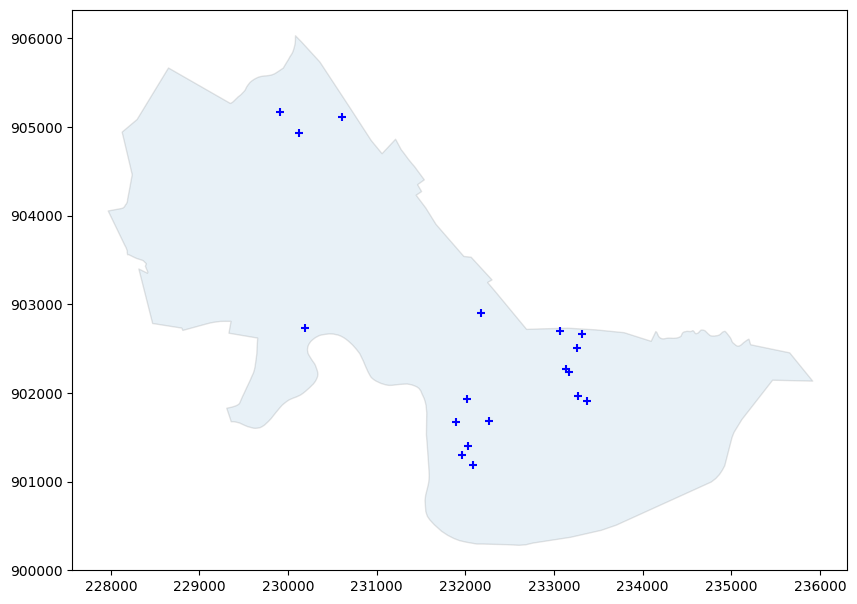

In [75]:
base=cambridge.plot(figsize=(10,10),alpha=0.1,edgecolor='black')
airbnb_source_gdf.plot(ax=base,marker="+",color='blue')

**Create a target grid:**

In [76]:
import tobler

tobler.util.h3fy(cambridge, resolution=10)

/usr/local/lib/python3.12/dist-packages/pyproj/crs/crs.py:1295: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


,geometry
hex_id,
8a2a30663ca7fff,"POLYGON ((234210.49 900978.405, 234237.34 9010..."
8a2a3067541ffff,"POLYGON ((231030.811 904487.192, 231003.966 90..."
8a2a30670c0ffff,"POLYGON ((229426.2 905046.801, 229348.056 9050..."
8a2a306719affff,"POLYGON ((231507.313 903053.168, 231429.179 90..."
8a2a30670347fff,"POLYGON ((230108.041 903386.271, 230029.904 90..."
...,...
8a2a306634a7fff,"POLYGON ((233451.255 900504.575, 233373.131 90..."
8a2a306752effff,"POLYGON ((232181.275 902914.921, 232259.409 90..."
8a2a3067040ffff,"POLYGON ((228691.325 904444.871, 228613.183 90..."


In [77]:
cambridge_grid10=tobler.util.h3fy(cambridge.to_crs(4326), resolution=10).to_crs(cambridge.crs)

**Get hexagon points:**

In [78]:
cambridge_target_locations = cambridge_grid10.centroid.get_coordinates()
cambridge_target_locations.head()

,x,y
hex_id,,
8a2a30663ca7fff,234159.215278,901034.986673
8a2a3067541ffff,231082.106852,904430.587303
8a2a30670c0ffff,229399.359754,904975.500670
8a2a306719affff,231480.468945,902981.883402
8a2a30670347fff,230081.200357,903314.983463


**Get coordinates of the airbnb units:**

In [79]:
airbnb_source_locations = airbnb_source_gdf.get_coordinates()
airbnb_source_locations

,x,y
79,230193.293785,902737.739708
85,229911.126367,905173.593204
252,232017.144851,901933.833770
585,232264.576530,901685.039988
626,233371.421160,901913.477105
645,230607.091600,905115.498713
798,232080.564257,901188.109180
806,232171.377421,902901.229890
810,233070.123071,902703.067688
1036,233256.647600,902510.952156


**Pull the rental prices:**

In [80]:
airbnb_source_gdf.price

,price
79,456.0
85,194.0
252,477.0
585,807.0
626,209.0
645,413.0
798,548.0
806,400.0
810,645.0
1036,555.0


**View the target grid:**

In [81]:
cambridge_target_locations

,x,y
hex_id,,
8a2a30663ca7fff,234159.215278,901034.986673
8a2a3067541ffff,231082.106852,904430.587303
8a2a30670c0ffff,229399.359754,904975.500670
8a2a306719affff,231480.468945,902981.883402
8a2a30670347fff,230081.200357,903314.983463
...,...,...
8a2a306634a7fff,233424.407431,900433.310119
8a2a306752effff,232208.121224,902986.205433
8a2a3067040ffff,228664.488209,904373.574909


 **Option One**: Charge the same as the closest airbnb similar to mine.

<Axes: >

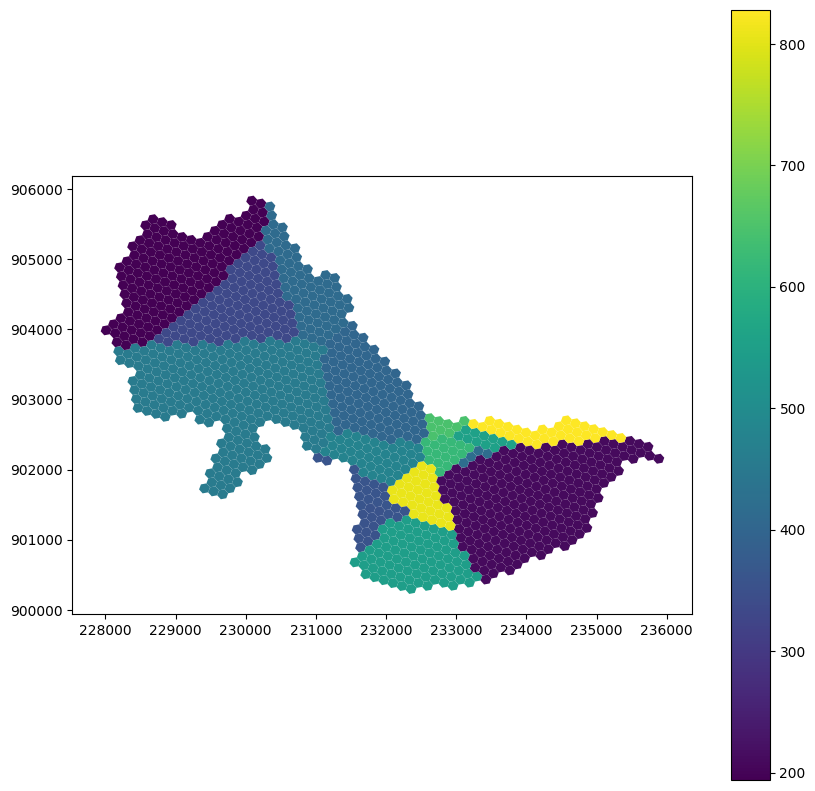

In [82]:
from scipy.interpolate import griddata

cambridge_grid10["nearest"] = griddata(points=airbnb_source_locations,
                                    values=airbnb_source_gdf.price,
                                    xi=cambridge_target_locations,
                                    method="nearest")

# here we have:

cambridge_grid10.plot('nearest', legend=True,figsize=(10,10))

**Option Two**: Charge the same as the average of the closest 5 similar AirBnb rental units.

<Axes: >

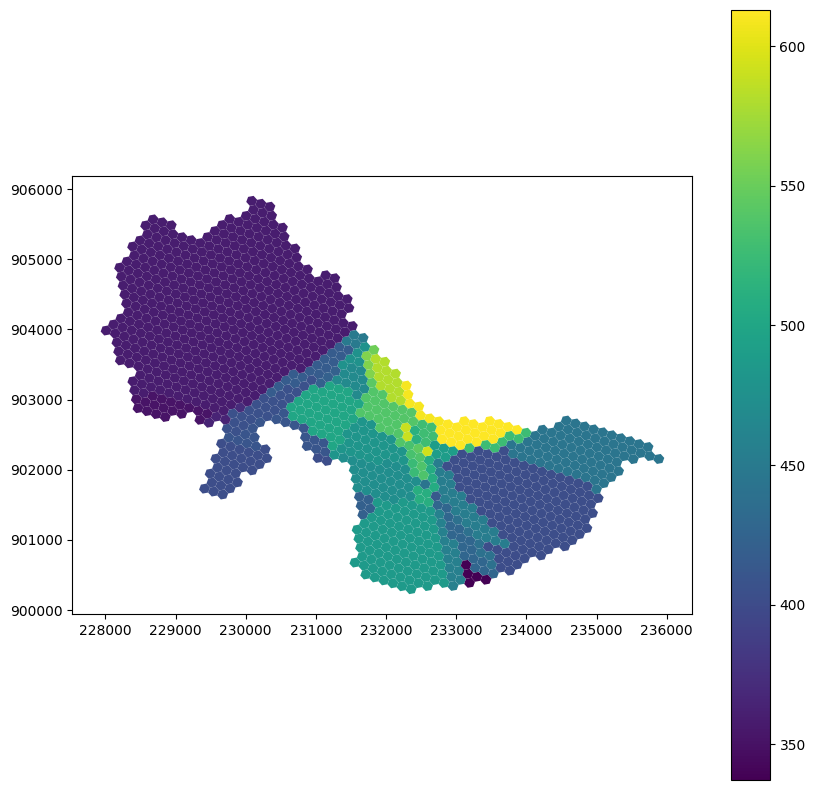

In [83]:
from sklearn.neighbors import KNeighborsRegressor

interpolation_uniform = KNeighborsRegressor(n_neighbors=5,
                                            weights="uniform").\
                                            fit(airbnb_source_locations,
                                                airbnb_source_gdf.price)

cambridge_grid10["knn5_uniform"] = interpolation_uniform.predict(cambridge_target_locations)

cambridge_grid10.plot("knn5_uniform", legend=True,figsize=(10,10))

**Option Three**: Charge based on some close AirBnb rental units, but weight the average based on distance. Closer units will weigh more, a further unit will weigh less. This is alsa called IDW (Inverse Distance Weight).

<Axes: >

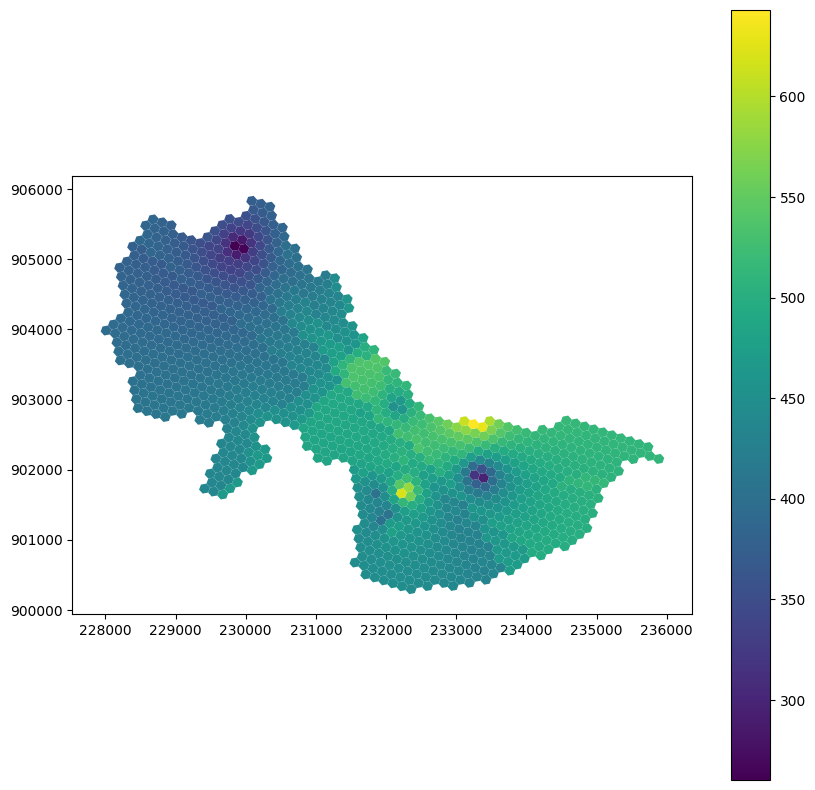

In [84]:



interpolation_IDW = KNeighborsRegressor(n_neighbors=10,
                                            weights="distance").\
                                            fit(airbnb_source_locations,
                                                airbnb_source_gdf.price)

cambridge_grid10["IDW_10"] = interpolation_IDW.predict(cambridge_target_locations)

# here we have
cambridge_grid10.plot("IDW_10", legend=True,figsize=(10,10))

**Option 4**: Inverse Distance Weighting (IDW) where the size of the local neighborhood is defined by a distance (1000m) instead of a fixed number of neighbors.

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


<Axes: >

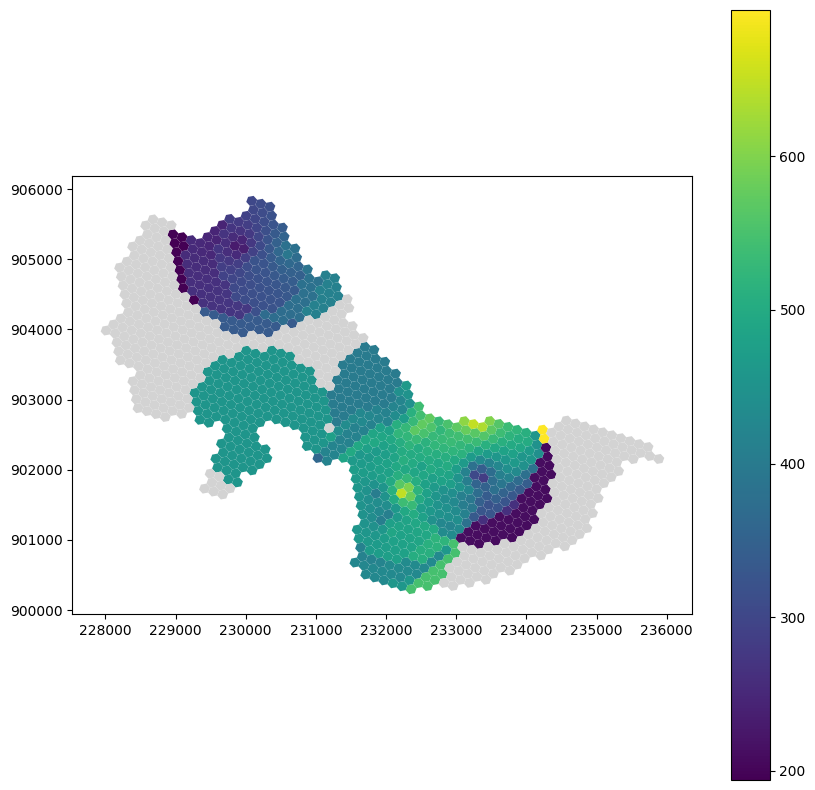

In [85]:
from sklearn.neighbors import RadiusNeighborsRegressor

interpolation_radius = RadiusNeighborsRegressor(
    radius=1000, weights="distance"
)
interpolation_radius.fit(
    airbnb_source_locations, airbnb_source_gdf.price
)

cambridge_grid10["radius_1000"] = interpolation_radius.predict(cambridge_target_locations)

cambridge_grid10.plot("radius_1000", legend=True, missing_kwds={'color': 'lightgrey'},figsize=(10,10))


**Determine the charge per night:**


In [86]:
from geopy.geocoders import Nominatim
from shapely.geometry import Point

geolocator = Nominatim(user_agent="theGeocoder")

myEstate_Address = geolocator.geocode(myEstate)

# see
myEstate_Address

Location(20, Maynard Place, Cambridge, Middlesex County, Massachusetts, 02163, United States of America, (42.3756013, -71.1317162, 0.0))

View location structure:

In [87]:
myEstate_Address.address, myEstate_Address.longitude,myEstate_Address.latitude

('20, Maynard Place, Cambridge, Middlesex County, Massachusetts, 02163, United States of America',
 -71.1317162,
 42.3756013)

Create GDF:

In [88]:
myEstats_gdf4326 = gpd.GeoDataFrame(
    {'address': [myEstate_Address.address]},
    geometry=[Point(myEstate_Address.longitude, myEstate_Address.latitude)],
    crs="EPSG:4326" # because of lon/lat
)

# reprojecting
myEstats_gdf = myEstats_gdf4326.to_crs(cambridge.crs)

# here it is
myEstats_gdf


,address,geometry
0,"20, Maynard Place, Cambridge, Middlesex County...",POINT (230331.472 902854.001)


Identify unit hexogon and find prices by option type:

In [89]:
myEstats_gdf.sjoin(
    cambridge_grid10,
    how="left",
    predicate="within"
)

,address,geometry,hex_id,nearest,knn5_uniform,IDW_10,radius_1000
0,"20, Maynard Place, Cambridge, Middlesex County...",POINT (230331.472 902854.001),8a2a30671c8ffff,456.0,405.8,436.581848,456.0


**Go with the Inverse Distance Weighting result:**

<Axes: >

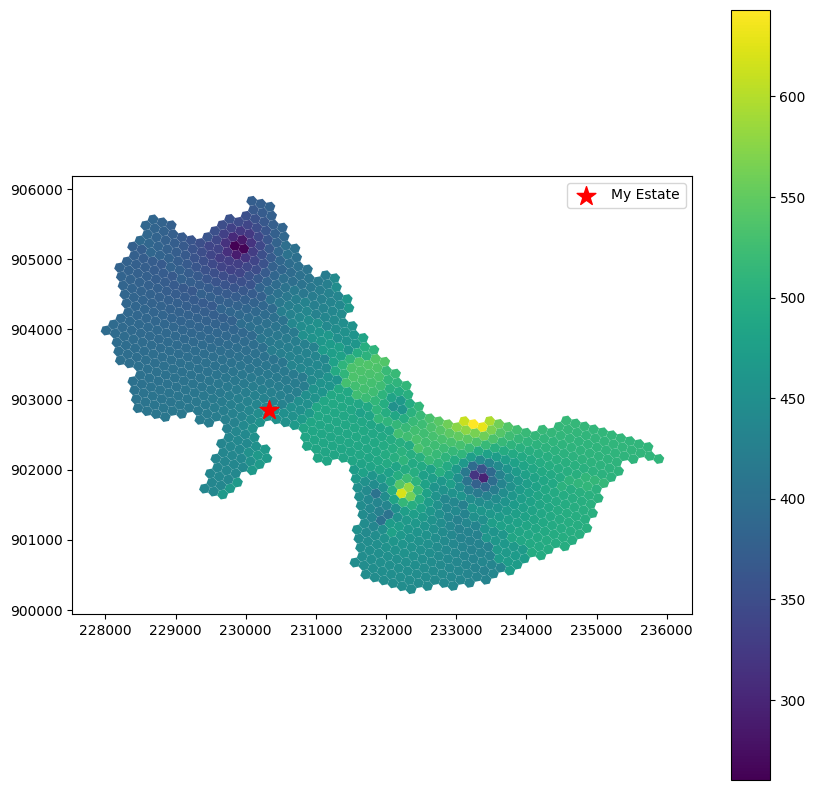

In [90]:
interpolation_IDW = KNeighborsRegressor(n_neighbors=10,
                                            weights="distance").\
                                            fit(airbnb_source_locations,
                                                airbnb_source_gdf.price)

cambridge_grid10["IDW_10"] = interpolation_IDW.predict(cambridge_target_locations)

base = cambridge_grid10.plot("IDW_10", legend=True,figsize=(10,10))

myEstats_gdf.plot(ax=base, color='red', marker='*', markersize=200, label='My Estate')

base.legend()

base

**Export to R:**

In [91]:
# Export cambridge_grid10 to a GeoPackage
cambridge_grid10.to_file("cambridge_grid10_idw.gpkg")

**Get table of options:**

In [92]:
prices_by_option = myEstats_gdf.sjoin(
    cambridge_grid10,
    how="left",
    predicate="within"
)

prices_by_option.to_csv("prices_by_option.csv", index=False)

**Export myEstats to R:**

In [93]:
myEstats_gdf.to_file("myEstats.gpkg", driver='GPKG')
